In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('Nutrical Dataset.csv')
print(df.head())   
df = df.dropna()
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)

In [5]:
import matplotlib.pyplot as plt

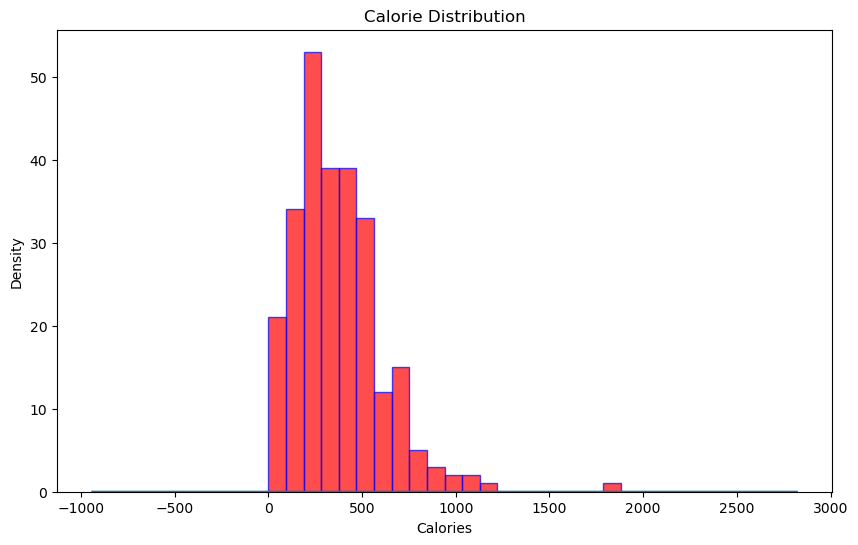

In [11]:
plt.figure(figsize=(10, 6))

df['Calories'].plot(kind='hist', bins=20, color='blue', edgecolor='blue', alpha=0.7)
df['Calories'].plot(kind='kde')

plt.xlabel('Calories')
plt.ylabel('Density')
plt.title('Calorie Distribution')
plt.show()

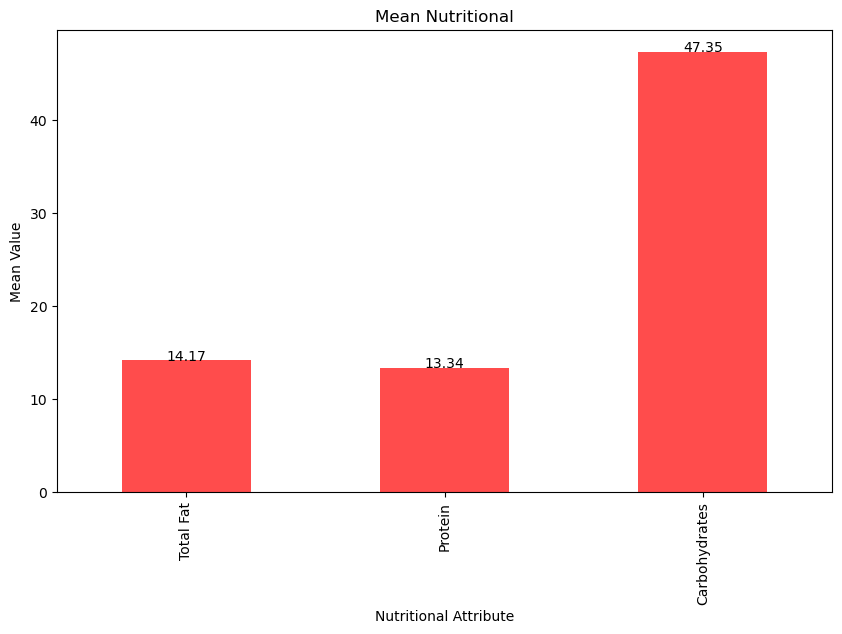

In [12]:
nutritional_columns = ['Total Fat', 'Protein', 'Carbohydrates']
nutritional_summary = df[nutritional_columns].describe()
plt.figure(figsize=(10, 6))
bars = nutritional_summary.loc['mean'].plot(kind='bar', color='red', alpha=0.7)
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             round(bar.get_height(), 2), ha='center')
plt.xlabel('Nutritional Attribute')
plt.ylabel('Mean Value')
plt.title('Mean Nutritional')
plt.show()

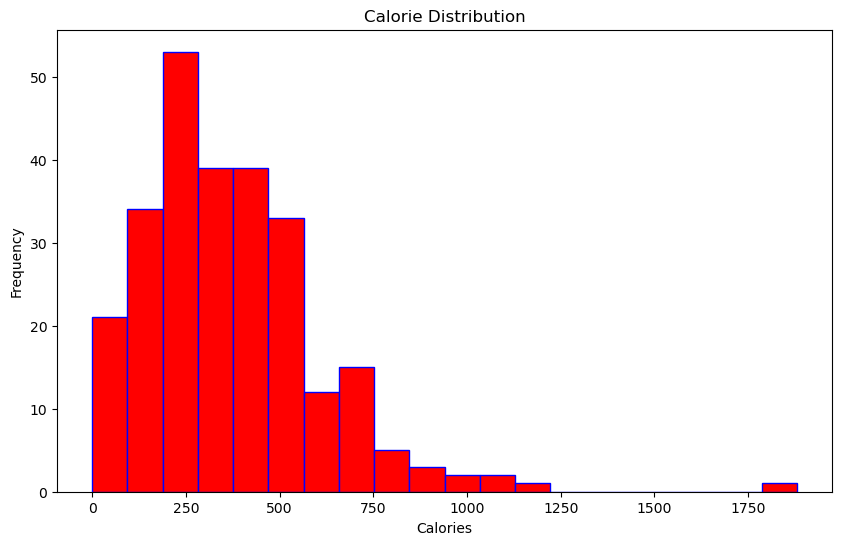

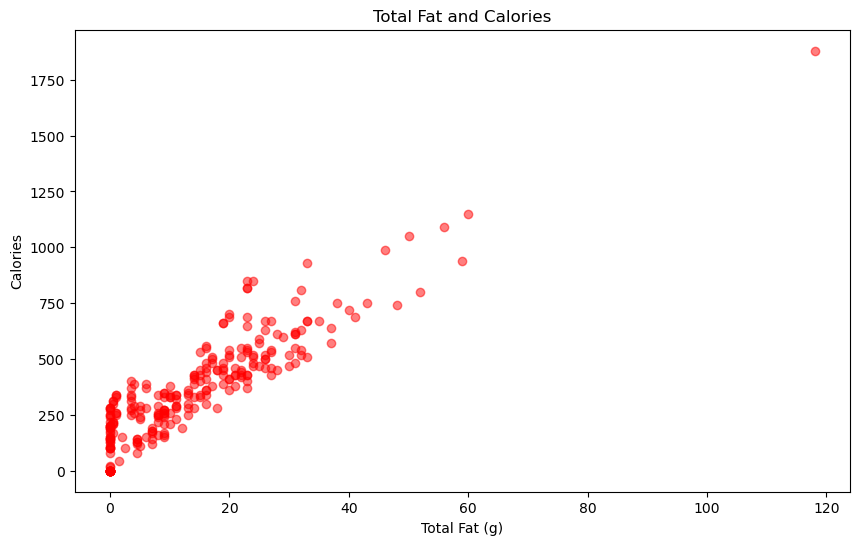

In [14]:
#Distribution of Calorie Counts Across Menu Items
plt.figure(figsize=(10, 6))
plt.hist(df['Calories'], bins=20, color='red', edgecolor='blue')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Calorie Distribution')
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(df['Total Fat'], df['Calories'], color='red', alpha=0.5)
plt.xlabel('Total Fat (g)')
plt.ylabel('Calories')
plt.title('Total Fat and Calories')
plt.show()

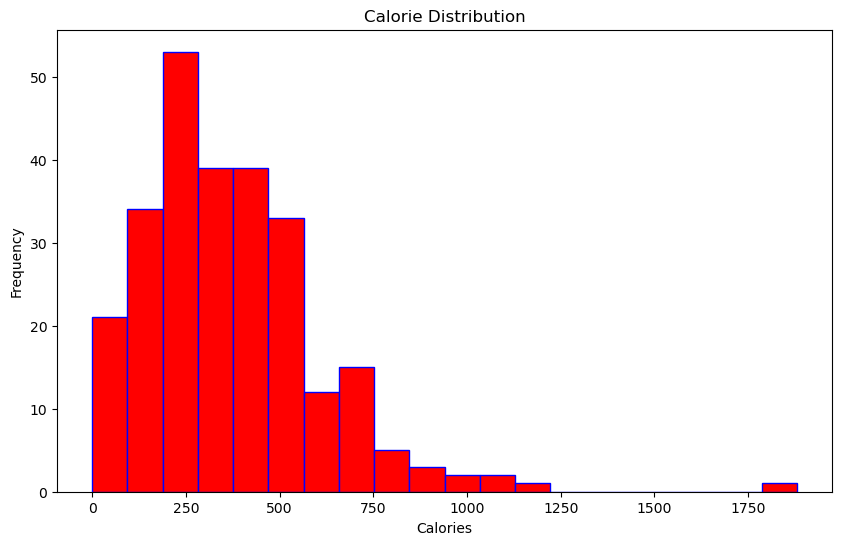

<Figure size 1000x600 with 0 Axes>

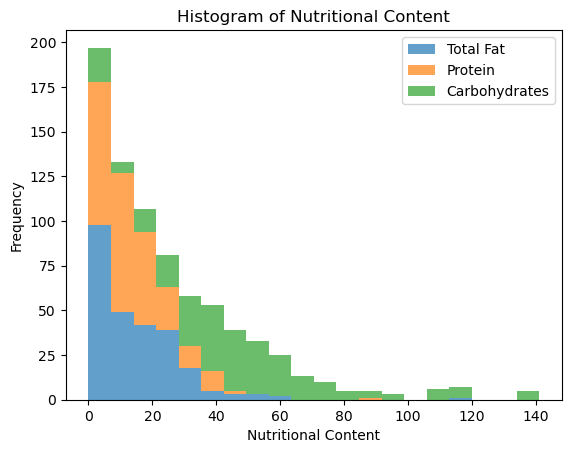

<Figure size 1000x600 with 0 Axes>

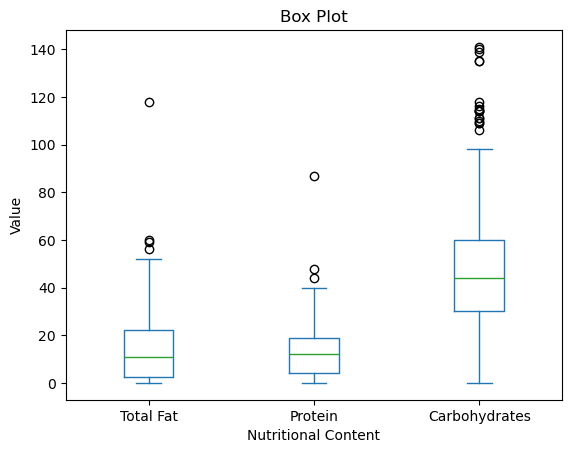

In [18]:
plt.figure(figsize=(10, 6))
df['Calories'].plot(kind='hist', bins=20, color='red', edgecolor='blue')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Calorie Distribution')
plt.show()
nutritional_columns = ['Total Fat', 'Protein', 'Carbohydrates']
plt.figure(figsize=(10, 6))
df[nutritional_columns].plot(kind='hist', bins=20, alpha=0.7, stacked=True)
plt.xlabel('Nutritional Content')
plt.ylabel('Frequency')
plt.title('Histogram of Nutritional Content')
plt.show()
plt.figure(figsize=(10, 6))
df[nutritional_columns].plot(kind='box')
plt.xlabel('Nutritional Content')
plt.ylabel('Value')
plt.title('Box Plot')
plt.show()

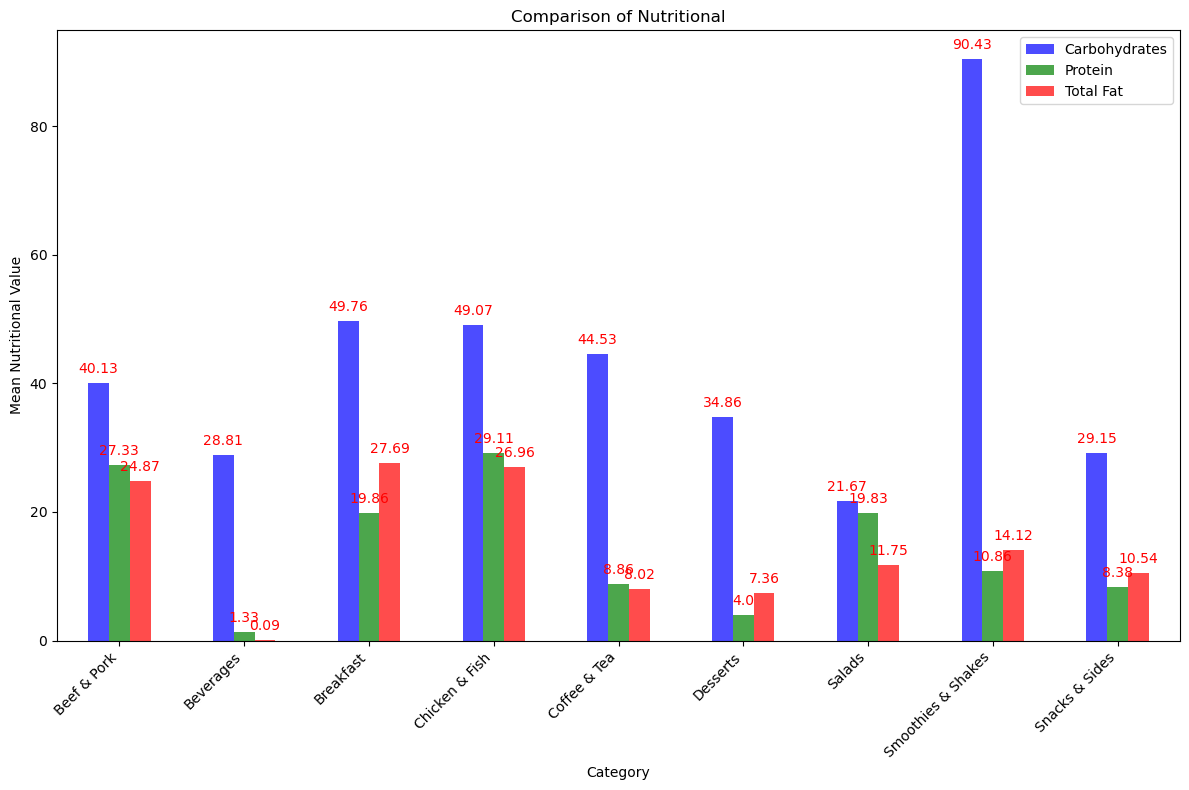

In [22]:

pivot_table = df.pivot_table(values=['Total Fat', 'Protein', 'Carbohydrates'], index='Category', aggfunc='mean')
ax = pivot_table.plot(kind='bar', figsize=(12, 8), color=['blue', 'green', 'red'], alpha=0.7) 
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='red', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel('Category')
plt.ylabel('Mean Nutritional Value')
plt.title('Comparison of Nutritional')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [23]:
highest_calories = df.loc[df['Calories'].idxmax()]
print("item with the highest calorie count:")
print(highest_calories[['Category', 'Item', 'Calories']])
lowest_calories = df.loc[df['Calories'].idxmin()]
print("item with the lowest calorie count:")
print(lowest_calories[['Category', 'Item', 'Calories']])

item with the highest calorie count:
Category                  Chicken & Fish
Item        Chicken McNuggets (40 piece)
Calories                            1880
Name: 82, dtype: object
item with the lowest calorie count:
Category            Beverages
Item        Diet Coke (Small)
Calories                    0
Name: 114, dtype: object


In [10]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

average_nutrition = df.groupby('Category')[numeric_columns].mean()

print("Average Nutritional Content of Popular Menu Categories:")
print(average_nutrition)

Average Nutritional Content of Popular Menu Categories:
                      Calories  Calories from Fat  Total Fat  \
Category                                                       
Beef & Pork         494.000000         224.666667  24.866667   
Beverages           113.703704           0.740741   0.092593   
Breakfast           526.666667         248.928571  27.690476   
Chicken & Fish      552.962963         242.222222  26.962963   
Coffee & Tea        283.894737          71.105263   8.021053   
Desserts            222.142857          64.285714   7.357143   
Salads              270.000000         108.333333  11.750000   
Smoothies & Shakes  531.428571         127.678571  14.125000   
Snacks & Sides      245.769231          94.615385  10.538462   

                    Total Fat (% Daily Value)  Saturated Fat  \
Category                                                       
Beef & Pork                         38.600000      10.466667   
Beverages                            0.148148  

# Summarize the findings and insights from the analysis.